In [50]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind 
import numpy as np

In [51]:
time_data = pd.read_csv('time.csv')
check_data = pd.read_csv('answer_check.csv')
feedback_time_data = pd.read_csv('time_on_feedback.csv')

ids = [11, 13, 14, 15, 19, 20, 22, 23, 24, 26, 29, 30, 
       101, 102, 103, 104, 105, 106, 108, 110, 114, 115, 118]

#[15,20,23,26,30,105,106,115,11,19,114,118] scored below average on either test

starting_ability = ['Low', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 
       'High', 'High', 'High', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low']

pre_test_mr = [23,27,30,16,24,15,29,20,29,12,25,22,25,28,30,29,15,15,29,30,23,22,28]
post_test_mr = [25,29,30,17,27,25,30,22,29,23,28,30,29,28,29,29,16,23,30,30,22,28,26]
pre_test_pf = [13,17,19,13,12,13,20,17,16,13,14,16,15,18,16,20,13,14,15,16,8,7,14]
post_test_pf = [17,19,19,13,15,18,20,19,17,13,15,20,15,20,19,20,13,18,17,16,7,14,18]
diff_mr = [post_test_mr[i] - pre_test_mr[i] for i in range(len(post_test_mr))]
diff_pf = [post_test_pf[i] - pre_test_pf[i] for i in range(len(post_test_pf))]

p-value:  0.005154650588036262 t_stat:  -3.1220121636181557


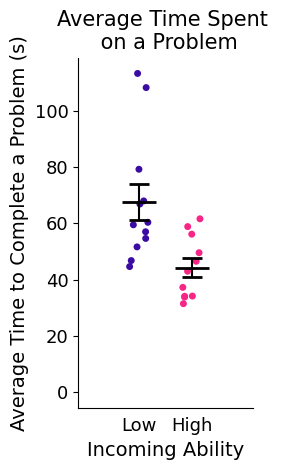

In [52]:
fig, ax = plt.subplots()
ax.set_xlabel('Incoming Ability', fontsize=14)
ax.set_ylabel("Average Time to Complete a Problem (s)", fontsize=14)
ax.set_title("Average Time Spent \n on a Problem", fontsize=15)

xs = list(range(1,116))
bugs = [38,41,42,81,83]
for item in bugs:
    xs.remove(item)

time_data = time_data.transpose()
time_data['mean'] = time_data.mean(axis=1)
time_data['Group'] = starting_ability
high_data = time_data[time_data['Group'] == 'High']['mean']
low_data = time_data[time_data['Group'] == 'Low']['mean']


ax.errorbar('', 0, 0, fmt="", color="white") #plots nothing to reduce space between two groups on the plot
sns.stripplot(data=time_data, x='Group', y=time_data['mean'], hue='Group', 
              legend=None, ax=ax, palette={'Low' : '#3A0CA3', 'High' : '#F72585'}, jitter=0.2)
ax.errorbar('High', high_data.mean(), yerr=high_data.sem(), fmt="_", color="black", capsize=7, markersize=25, markeredgewidth=2, zorder=5)
ax.errorbar('Low', low_data.mean(), yerr=low_data.sem(), fmt="_", color="black", capsize=7, markersize=25, markeredgewidth=2, zorder=5)
ax.errorbar('  ', 0, 0, fmt="", color="white") #plots nothing to reduce space between two groups on the plot
ax.set_box_aspect(2/1)
ax.spines[['right', 'top']].set_visible(False)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)
fig.tight_layout()

t_stat, p_val = ttest_ind(high_data, low_data, nan_policy="omit")
print("p-value: ", p_val, 't_stat: ', t_stat)

#plt.savefig("ability vs time")


p-value:  0.03650479161631191


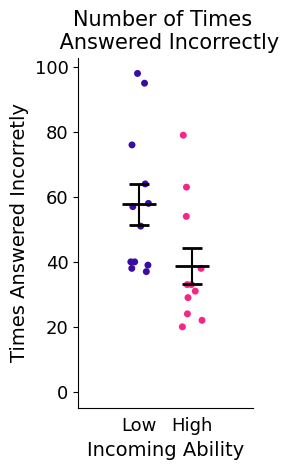

In [53]:
fig, ax = plt.subplots()
ax.set_xlabel('Incoming Ability', fontsize=14)
ax.set_ylabel("Times Answered Incorretly", fontsize=14)
ax.set_title("Number of Times \n Answered Incorrectly", fontsize=15)

xs = range(1,116)

check_data = check_data.transpose()
check_data -= 1 # check answer is pressed once even if correct
check_data[check_data <= 0] = 0 


check_data['sum'] = check_data.sum(axis=1)
check_data['Group'] = starting_ability
high_data = check_data[check_data['Group'] == 'High']['sum']
low_data = check_data[check_data['Group'] == 'Low']['sum']


ax.errorbar('', 0, yerr=0, fmt="", color="white") #plots nothing to reduce space between two groups on the plot
sns.stripplot(data=check_data, x='Group', y=check_data['sum'], hue='Group', 
              legend=None, ax=ax, palette={'Low' : '#3A0CA3', 'High' : '#F72585'}, jitter=0.2)
ax.errorbar('High', high_data.mean(), yerr=high_data.sem(), fmt="_", color="black", capsize=7, markersize=25, markeredgewidth=2, zorder=5)
ax.errorbar('Low', low_data.mean(), yerr=low_data.sem(), fmt="_", color="black", capsize=7, markersize=25, markeredgewidth=2, zorder=5)
ax.errorbar('  ', 0, yerr=0, fmt="", color="white") #plots nothing to reduce space between two groups on the plot
ax.set_box_aspect(2/1)
ax.spines[['right', 'top']].set_visible(False)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)
fig.tight_layout()

t_stat, p_val = ttest_ind(high_data, low_data, nan_policy="omit")
print("p-value: ", p_val)

#plt.savefig("ability vs incorrect")

p-value:  0.26299129575874003


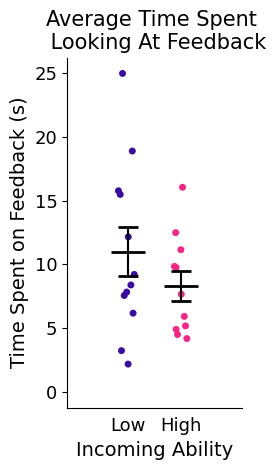

In [54]:
fig, ax = plt.subplots()
ax.set_xlabel('Incoming Ability', fontsize=14)
ax.set_ylabel("Time Spent on Feedback (s)", fontsize=14)
ax.set_title("Average Time Spent \n Looking At Feedback", fontsize=15)

#xs = list(range(1,116))

xs = list(range(27,44)) + list(range(64,84)) + list(range(100,116))
feedback_time_data = feedback_time_data.drop(index=range(1,27)) # only keep type 3-4 problems (27/64/100 to keep 3-4, 36/74/108 to keep 4)
feedback_time_data = feedback_time_data.drop(index=range(44,64))
feedback_time_data = feedback_time_data.drop(index=range(84,100))

feedback_time_data = feedback_time_data.transpose()
feedback_time_data['mean'] = feedback_time_data.mean(axis=1)
feedback_time_data['Group'] = starting_ability
high_data = feedback_time_data[feedback_time_data['Group'] == 'High']['mean']
low_data = feedback_time_data[feedback_time_data['Group'] == 'Low']['mean']

ax.errorbar('', 0, yerr=0, fmt="", color="white") #plots nothing to reduce space between two groups on the plot
sns.stripplot(data=feedback_time_data, x='Group', y=feedback_time_data['mean'], hue='Group', 
              legend=None, ax=ax, palette={'Low' : '#3A0CA3', 'High' : '#F72585'}, jitter=0.2)
ax.errorbar('High', high_data.mean(), yerr=high_data.sem(), fmt="_", color="black", capsize=7, markersize=25, markeredgewidth=2, zorder=5)
ax.errorbar('Low', low_data.mean(), yerr=low_data.sem(), fmt="_", color="black", capsize=7, markersize=25, markeredgewidth=2, zorder=5)
ax.errorbar('  ', 0, yerr=0, fmt="", color="white") #plots nothing to reduce space between two groups on the plot
ax.set_box_aspect(2/1)
ax.spines[['right', 'top']].set_visible(False)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)
fig.tight_layout()
#plt.tick_params(labelsize=12)
#sns.set_context('paper', font_scale=1.4)

t_stat, p_val = ttest_ind(high_data, low_data, nan_policy="omit")
print("p-value: ", p_val)

#plt.savefig("ability vs feedback time")

Figure(640x480)


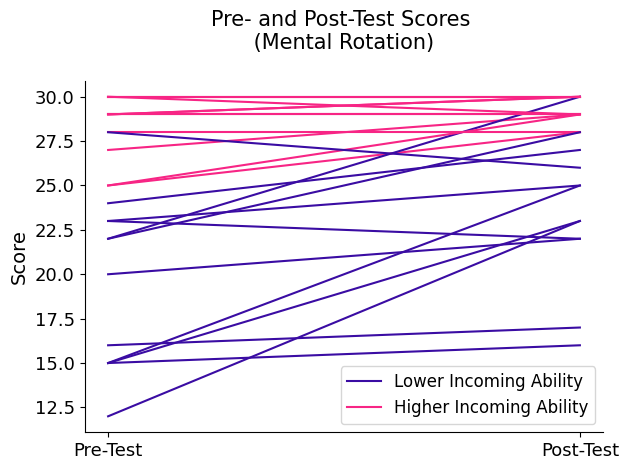

In [55]:
scores_df = pd.DataFrame([ids + ids, starting_ability + starting_ability, 
                          pre_test_mr + post_test_mr, pre_test_pf + post_test_pf,
                          list('Pre-Test' for i in range(23)) + list('Post-Test' for i in range(23))])
scores_df = scores_df.transpose()
scores_df.columns = ['ID', 'Ability', 'MR_scores', 'PF_scores', 'Test']

fig, ax = plt.subplots()
ax.set_xlabel(None)
ax.set_ylabel("Score", fontsize=14)
ax.set_title("Pre- and Post-Test Scores \n (Mental Rotation) \n", fontsize=15)

for student in ids:
    color = ''
    label = ''
    student_scores = scores_df[scores_df['ID'] == student]
    if (student_scores['Ability'] == 'High').all():
        color = '#F72585'
        label = 'Higher Incoming Ability'
    else:
        color = '#3A0CA3'
        label = 'Lower Incoming Ability'
    plt.plot(student_scores.Test, student_scores.MR_scores, color=color, label=label)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=13)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='lower right', bbox_to_anchor=(1.0, 0.12)) #for pf
plt.legend(by_label.values(), by_label.keys(), fontsize=12) # for mr
fig.tight_layout()

print(fig)

#plt.savefig('pre to post vs ability mr')


Figure(640x480)


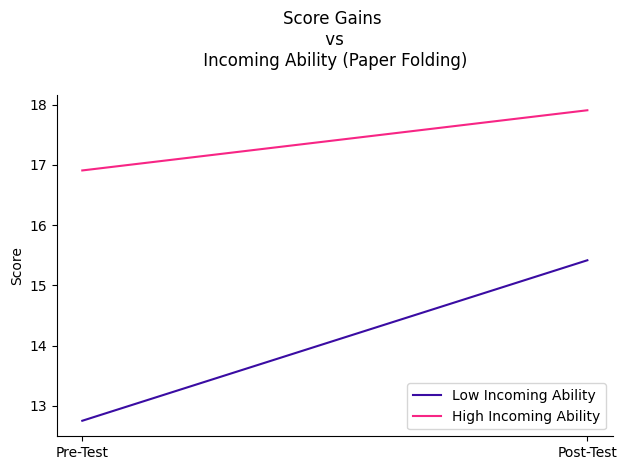

In [56]:
gains_df = pd.DataFrame([ids, starting_ability, diff_mr, diff_pf, pre_test_mr, post_test_mr, pre_test_pf, post_test_pf])
gains_df = gains_df.transpose()
gains_df.columns = ['ID', 'Ability', 'MR_gain', 'PF_gain', 'pre_mr', 'post_mr', 'pre_pf', 'post_pf']


high_mr = gains_df[gains_df['Ability'] == 'High']['MR_gain'].apply(pd.to_numeric)
low_mr = gains_df[gains_df['Ability'] == 'Low']['MR_gain'].apply(pd.to_numeric)

t_stat, p_val = ttest_ind(high_mr, low_mr, nan_policy="omit")
print("MR high vs low p-value: ", p_val, 't_stat: ', t_stat)

high_pf = gains_df[gains_df['Ability'] == 'High']['PF_gain'].apply(pd.to_numeric)
low_pf = gains_df[gains_df['Ability'] == 'Low']['PF_gain'].apply(pd.to_numeric)

t_stat, p_val = ttest_ind(high_pf, low_pf, nan_policy="omit")
print("PF high vs low p-value: ", p_val, 't_stat: ', t_stat)


fig, ax = plt.subplots()
ax.set_xlabel(None)
ax.set_ylabel("Score")
ax.set_title("Score Gains \n vs \n Incoming Ability (Paper Folding) \n")

high_pre_mr = gains_df[gains_df['Ability'] == 'High']['pre_mr'].apply(pd.to_numeric)
high_post_mr = gains_df[gains_df['Ability'] == 'High']['post_mr'].apply(pd.to_numeric)
low_pre_mr = gains_df[gains_df['Ability'] == 'Low']['pre_mr'].apply(pd.to_numeric)
low_post_mr = gains_df[gains_df['Ability'] == 'Low']['post_mr'].apply(pd.to_numeric)
high_pre_pf = gains_df[gains_df['Ability'] == 'High']['pre_pf'].apply(pd.to_numeric)
high_post_pf = gains_df[gains_df['Ability'] == 'High']['post_pf'].apply(pd.to_numeric)
low_pre_pf = gains_df[gains_df['Ability'] == 'Low']['pre_pf'].apply(pd.to_numeric)
low_post_pf = gains_df[gains_df['Ability'] == 'Low']['post_pf'].apply(pd.to_numeric)

plt.plot(['Pre-Test', 'Post-Test'], [low_pre_pf.mean(), low_post_pf.mean()], color='#3A0CA3', label='Low Incoming Ability')
plt.plot(['Pre-Test', 'Post-Test'], [high_pre_pf.mean(), high_post_pf.mean()], color='#F72585', label='High Incoming Ability')
fig.tight_layout()
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc='lower right')
print(fig)

#plt.savefig("avg pre to post vs ability pf")


MR high vs low p-value:  0.03312526603755856 t_stat:  -2.273260625497102
PF high vs low p-value:  0.11392014739438103 t_stat:  -1.6462716088817821
Paper MR high vs low p-value:  0.02863985703069303 t_stat:  -2.2990849825636923
Paper PF high vs low p-value:  0.514214728978036 t_stat:  0.6601181963728192
Pre vs pre mr:  0.0003001977466143747 t-stat:  3.8649957243904445
Pre vs pre mr:  0.10333569400714834 t-stat:  1.6569182693363316


Text(0.5, 1.0, 'Q-Q Plot')

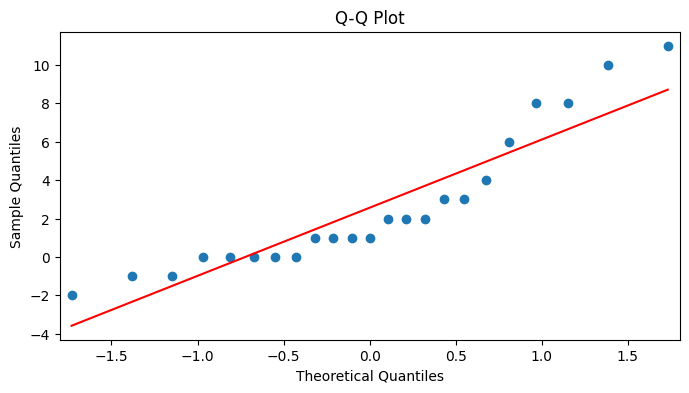

In [57]:
paper_mr_pre = [14,21,14,20,17,21,14,20,12,17,29,13,18,14,15,11,8,24,23,25,12,26,19,20,13,19,18,12,26,23,22,15]
paper_pf_pre = [10,11,12,15,13,12,16,11,14,14,20,13,13,15,15,13,5,16,15,16,8,15,13,12,14,12,9,15,20,15,14,12]
vr_pf_pre = [13,17,19,13,12,13,20,17,16,13,14,16,15,15,18,16,20,13,14,15,16,8,7,14]
vr_mr_pre = [23,27,30,16,24,15,29,20,29,12,25,22,20,25,28,30,29,15,15,29,30,23,22,28]

# Pre test vs pre test

t_stat, p_val = ttest_ind(vr_mr_pre, paper_mr_pre)
print("Pre vs pre mr: ", p_val, "t-stat: ", t_stat)


t_stat, p_val = ttest_ind(vr_pf_pre, paper_pf_pre)
print("Pre vs pre mr: ", p_val, "t-stat: ", t_stat)



## Q-Q Plot example

fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)
sm.qqplot(gains_df['MR_gain'], dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")